In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('datasets/e_commerce_sales.csv')
data.head()

,index,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,0,2354,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,1,2361,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,2,2415,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,3,2427,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,4,2456,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      5000 non-null   int64  
 1   CustomerID                 5000 non-null   int64  
 2   TOTAL_ORDERS               5000 non-null   int64  
 3   REVENUE                    5000 non-null   float64
 4   AVERAGE_ORDER_VALUE        5000 non-null   float64
 5   CARRIAGE_REVENUE           5000 non-null   float64
 6   AVERAGESHIPPING            5000 non-null   float64
 7   FIRST_ORDER_DATE           5000 non-null   object 
 8   LATEST_ORDER_DATE          5000 non-null   object 
 9   AVGDAYSBETWEENORDERS       5000 non-null   float64
 10  DAYSSINCELASTORDER         5000 non-null   int64  
 11  MONDAY_ORDERS              5000 non-null   int64  
 12  TUESDAY_ORDERS             5000 non-null   int64  
 13  WEDNESDAY_ORDERS           5000 non-null   int64

In [4]:
# 첫 주문일, 최근 주문 일자 형식 변환 (기준일 : 2021-10-25)
from datetime import datetime

data['FIRST_ORDER_DATE'] = (datetime.strptime('2021-10-25', '%Y-%m-%d') - pd.to_datetime(data['FIRST_ORDER_DATE'])).dt.days
data['LATEST_ORDER_DATE'] = (datetime.strptime('2021-10-25', '%Y-%m-%d') - pd.to_datetime(data['LATEST_ORDER_DATE'])).dt.days

<Axes: >

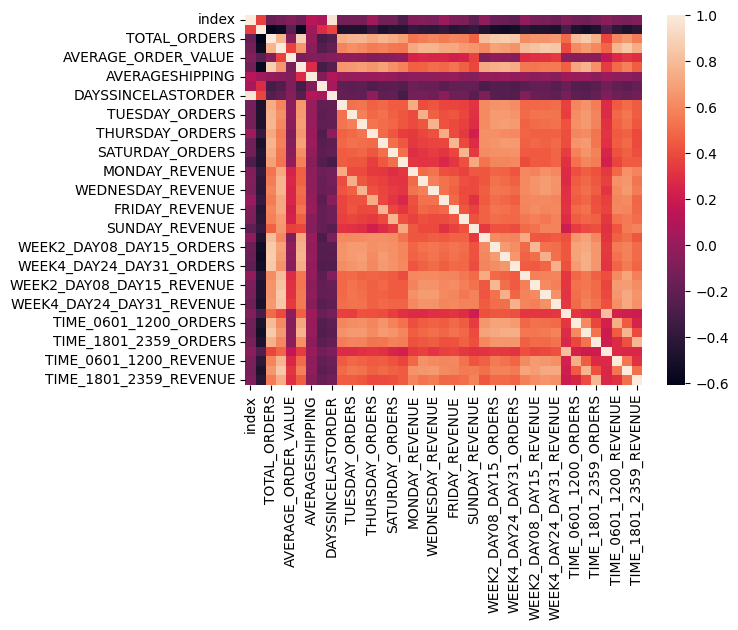

In [5]:
data_corr = data.drop(['FIRST_ORDER_DATE', 'LATEST_ORDER_DATE'], axis=1).corr()
sns.heatmap(data_corr)

In [6]:
df_info = data[['CustomerID', 'TOTAL_ORDERS', 'REVENUE', 'AVERAGE_ORDER_VALUE', 'CARRIAGE_REVENUE', 'AVERAGESHIPPING', 'FIRST_ORDER_DATE', 'LATEST_ORDER_DATE',
                'AVGDAYSBETWEENORDERS', 'DAYSSINCELASTORDER']]

df_weekday = data[['CustomerID', 'MONDAY_ORDERS', 'TUESDAY_ORDERS', 'WEDNESDAY_ORDERS', 'THURSDAY_ORDERS', 'FRIDAY_ORDERS', 'SATURDAY_ORDERS', 'SUNDAY_ORDERS',
                 'MONDAY_REVENUE', 'TUESDAY_REVENUE', 'WEDNESDAY_REVENUE', 'THURSDAY_REVENUE', 'FRIDAY_REVENUE', 'SATURDAY_REVENUE', 'SUNDAY_REVENUE']]

df_week = data[['CustomerID', 'WEEK1_DAY01_DAY07_ORDERS', 'WEEK2_DAY08_DAY15_ORDERS', 'WEEK3_DAY16_DAY23_ORDERS', 'WEEK4_DAY24_DAY31_ORDERS',
                'WEEK1_DAY01_DAY07_REVENUE', 'WEEK2_DAY08_DAY15_REVENUE', 'WEEK3_DAY16_DAY23_REVENUE', 'WEEK4_DAY24_DAY31_REVENUE']]

df_time = data[['CustomerID', 'TIME_0000_0600_ORDERS', 'TIME_0601_1200_ORDERS', 'TIME_1200_1800_ORDERS', 'TIME_1801_2359_ORDERS',
                'TIME_0000_0600_REVENUE', 'TIME_0601_1200_REVENUE', 'TIME_1200_1800_REVENUE', 'TIME_1801_2359_REVENUE']]

In [7]:
df_info.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER
0,2354,124,11986.54,96.67,529.59,4.27,1760,1,14.19,1
1,2361,82,11025.96,134.46,97.92,1.19,1304,1,15.89,1
2,2415,43,7259.69,168.83,171.69,3.99,1425,1,33.12,1
3,2427,44,6992.27,158.92,92.82,2.11,930,1,21.11,1
4,2456,55,6263.44,113.88,179.04,3.26,367,1,6.65,1


### df_info 가설 :  
1. (TOTAL_ORDERS)주문 수가 많은 사람은 총 구매액 (REVENUE)가 높을 것이다.  
2. (DAYSSINCELASTORDER)미지막 주문으로부터 ##일 이상 지난 사람은 주문 수(TOTAL_ORDERS)가 적을 것이다.  
3. (AVGDAYSBETWEENORDERS) 평균 주문 간격이 짧은 사람은 주문 수(TOTAL_ORDERS)가 많을 것이다.  
4. 평균 배송 금액이 높을 수록 총 주문 수는 낮을 것이다.  

In [8]:
df_weekday.head()

,CustomerID,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,SATURDAY_ORDERS,SUNDAY_ORDERS,MONDAY_REVENUE,TUESDAY_REVENUE,WEDNESDAY_REVENUE,THURSDAY_REVENUE,FRIDAY_REVENUE,SATURDAY_REVENUE,SUNDAY_REVENUE
0,2354,13,13,29,25,19,15,10,1287.50,1054.15,2842.52,2133.79,2051.94,1496.33,1120.31
1,2361,11,13,10,13,14,10,11,1253.08,2003.25,1819.75,1114.83,1791.86,1624.34,1418.85
2,2415,5,4,3,5,5,8,13,698.95,504.97,197.97,1182.97,733.96,1223.96,2716.91
3,2427,10,8,5,8,5,3,5,1753.95,1400.23,570.48,1154.06,798.07,630.00,685.48
4,2456,2,3,8,8,12,10,12,150.98,330.38,1090.23,563.63,1339.44,956.56,1832.22


In [9]:
df_weekday_order = df_weekday.iloc[:, :8]
df_weekday_order.head()

,CustomerID,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,SATURDAY_ORDERS,SUNDAY_ORDERS
0,2354,13,13,29,25,19,15,10
1,2361,11,13,10,13,14,10,11
2,2415,5,4,3,5,5,8,13
3,2427,10,8,5,8,5,3,5
4,2456,2,3,8,8,12,10,12


In [10]:
df_weekday_revenue = df_weekday.iloc[:, [0, 8, 9, 10, 11, 12, 13, 14]]
df_weekday_revenue.head()

,CustomerID,MONDAY_REVENUE,TUESDAY_REVENUE,WEDNESDAY_REVENUE,THURSDAY_REVENUE,FRIDAY_REVENUE,SATURDAY_REVENUE,SUNDAY_REVENUE
0,2354,1287.50,1054.15,2842.52,2133.79,2051.94,1496.33,1120.31
1,2361,1253.08,2003.25,1819.75,1114.83,1791.86,1624.34,1418.85
2,2415,698.95,504.97,197.97,1182.97,733.96,1223.96,2716.91
3,2427,1753.95,1400.23,570.48,1154.06,798.07,630.00,685.48
4,2456,150.98,330.38,1090.23,563.63,1339.44,956.56,1832.22


In [11]:
sum_order_day = []
sum_revenue_day = []
for i in range(1, 8):
    sum_order_day.append(df_weekday_order.iloc[:, i].sum())
    sum_revenue_day.append(int(df_weekday_revenue.iloc[:, i].sum()))

print(sum_order_day)
print(sum_revenue_day)

[8145, 8772, 8990, 10670, 9731, 8417, 9627]
[1076041, 1167552, 1178446, 1329748, 1252902, 1098210, 1304716]


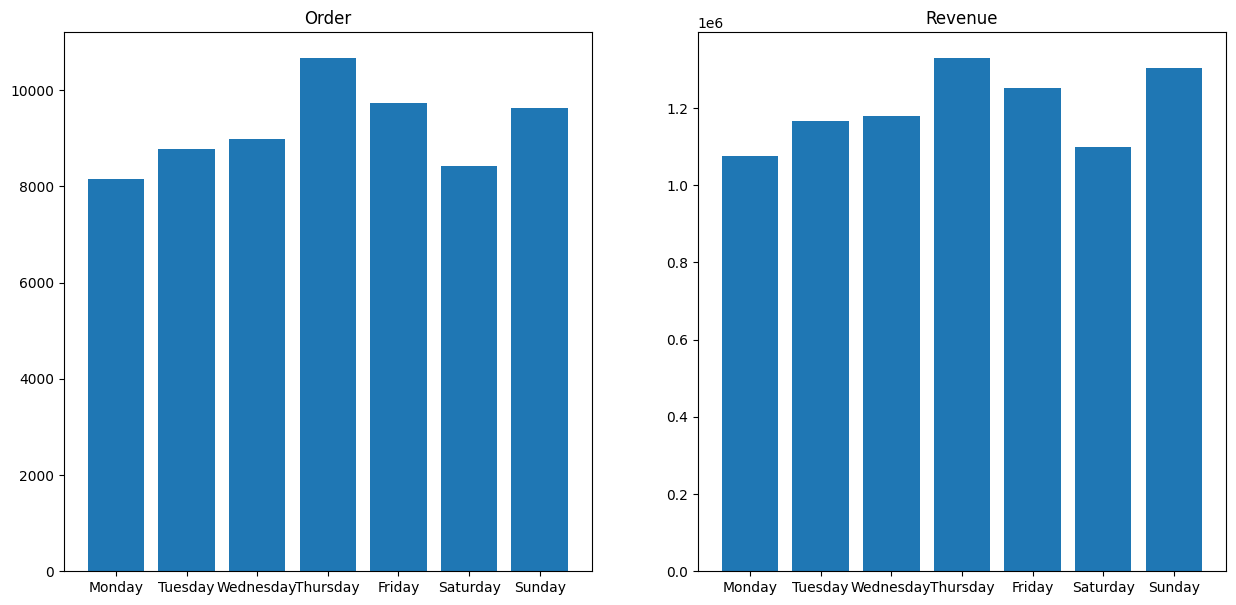

In [12]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

f, axes = plt.subplots(1, 2)
f.set_size_inches(15, 7)

axes[0].bar(weekday, sum_order_day)
axes[0].set_title('Order')

axes[1].bar(weekday, sum_revenue_day)
axes[1].set_title('Revenue')
plt.show()

주문과 매출의 요일별 양상은 똑같으며, 대략적으로    
(목 -> (금, 일) -> 수 -> 화 -> (월, 토)) 순으로 활발함

### 요일 관련 가설  
1. 주문 빈도 or 총 주문액 or 주문 횟수가 많은 사람은 특정 요일에 더 많이 구매하는 경향이 있다. (+ 역)

In [13]:
df_week.head()

,CustomerID,WEEK1_DAY01_DAY07_ORDERS,WEEK2_DAY08_DAY15_ORDERS,WEEK3_DAY16_DAY23_ORDERS,WEEK4_DAY24_DAY31_ORDERS,WEEK1_DAY01_DAY07_REVENUE,WEEK2_DAY08_DAY15_REVENUE,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE
0,2354,28,42,30,24,2685.37,4299.28,2592.18,2409.71
1,2361,18,19,19,26,1336.09,2776.02,2807.66,4106.19
2,2415,9,11,6,17,2299.93,1383.92,713.94,2861.90
3,2427,12,15,9,8,2317.95,2417.22,997.02,1260.08
4,2456,10,18,21,6,831.14,1938.18,2725.66,768.46


In [14]:
df_week_order = df_week.iloc[:, 1:5]
df_week_revenue = df_week.iloc[:, 5:]

sum_order_week = []
sum_revenue_week = []

for i in range(4):
    sum_order_week.append(df_week_order.iloc[:, i].sum())
    sum_revenue_week.append(int(df_week_revenue.iloc[:, i].sum()))
print(sum_order_week)
print(sum_revenue_week)

[14989, 15313, 16150, 17900]
[1893191, 2032978, 2109134, 2372314]


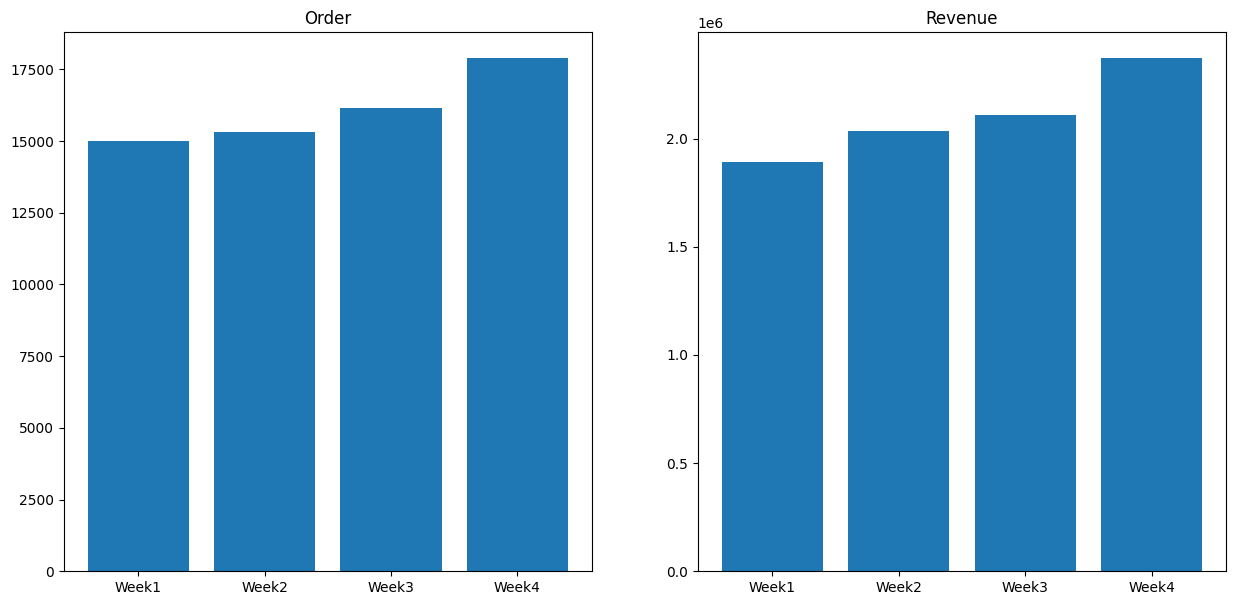

In [15]:
week = ['Week1', 'Week2', 'Week3', 'Week4']

f, axes = plt.subplots(1, 2)
f.set_size_inches(15, 7)

axes[0].bar(week, sum_order_week)
axes[0].set_title('Order')

axes[1].bar(week, sum_revenue_week)
axes[1].set_title('Revenue')
plt.show()

### 주차별 가설  
1. 목요일의 높은 매출은 마지막 주의 높은 매출 때문이다. (월급날?)

In [16]:
df_time.head()

,CustomerID,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,2354,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,2361,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,2415,0,6,12,25,0.00,707.98,2560.91,3990.80
3,2427,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,2456,6,9,27,13,501.34,1197.83,3004.77,1559.50


In [17]:
df_time_order = df_time.iloc[:, 1:5]
df_time_revenue = df_time.iloc[:, 5:]

sum_order_time = []
sum_revenue_time = []

for i in range(4):
    sum_order_time.append(df_time_order.iloc[:, i].sum())
    sum_revenue_time.append(int(df_time_revenue.iloc[:, i].sum()))
print(sum_order_time)
print(sum_revenue_time)

[5144, 18731, 22170, 18307]
[655313, 2434319, 2923658, 2394328]


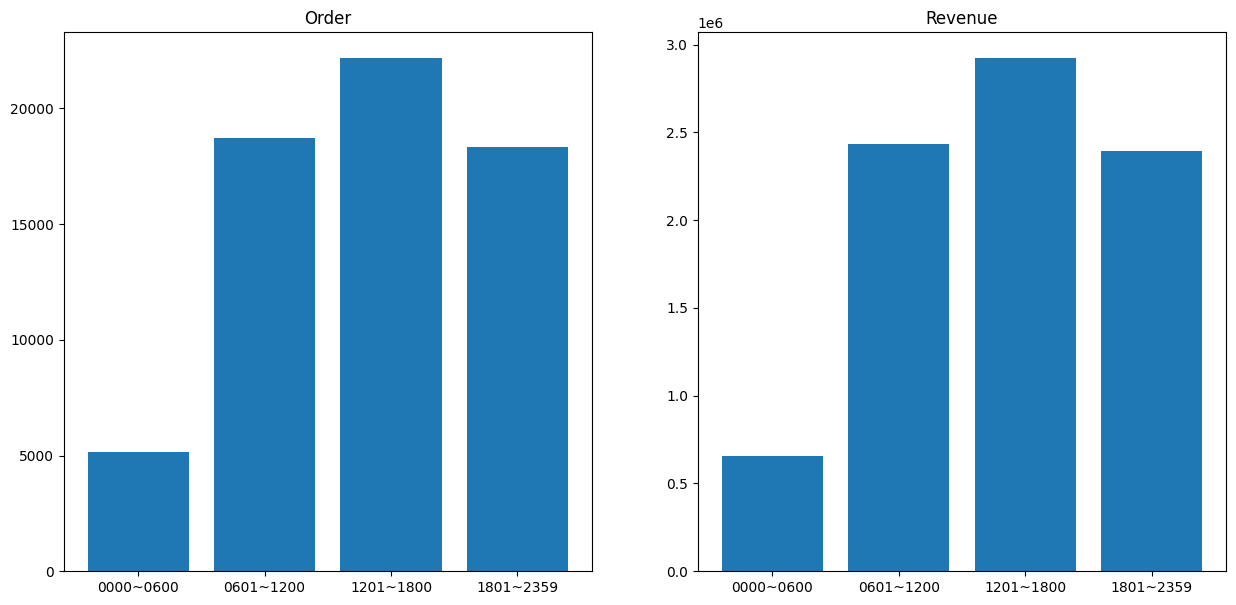

In [18]:
time = ['0000~0600', '0601~1200', '1201~1800', '1801~2359']

f, axes = plt.subplots(1, 2)
f.set_size_inches(15, 7)

axes[0].bar(time, sum_order_time)
axes[0].set_title('Order')

axes[1].bar(time, sum_revenue_time)
axes[1].set_title('Revenue')
plt.show()

## 요약  
### df_info 가설 :  
1. (TOTAL_ORDERS)주문 수가 많은 사람은 총 구매액 (REVENUE)가 높을 것이다.  
2. (DAYSSINCELASTORDER)마지막 주문으로부터 ##일 이상 지난 사람은 주문 수(TOTAL_ORDERS)가 적을 것이다.  
3. (AVGDAYSBETWEENORDERS) 평균 주문 간격이 짧은 사람은 주문 수(TOTAL_ORDERS)가 많을 것이다.  
4. 평균 배송 금액이 높을 수록 총 주문 수는 낮을 것이다.  

### 요일별 가설
주문과 매출의 요일별 양상은 똑같으며, 대략적으로    
(목 -> (금, 일) -> 수 -> 화 -> (월, 토)) 순으로 활발함  
1. 주문 빈도 or 총 주문액 or 주문 횟수가 많은 사람은 특정 요일에 더 많이 구매하는 경향이 있다. (+ 역)

### 주차별 가설  
1. 목요일의 높은 매출은 마지막 주의 높은 매출 때문이다. (월급날?)

# 분석

1. 귀무가설 : 주문 수가 많은 사람은 총 구매액이 높을 것이다.  
상관분석

In [19]:
from scipy import stats
df2 = data[['TOTAL_ORDERS', 'REVENUE']]


print(df2.corr())
print('---------------')
print(stats.pearsonr(df2['REVENUE'], df2['TOTAL_ORDERS']))

              TOTAL_ORDERS   REVENUE
TOTAL_ORDERS      1.000000  0.771996
REVENUE           0.771996  1.000000
---------------
PearsonRResult(statistic=0.7719960094538744, pvalue=0.0)


## 상관계수 0.77에 유의확률 0.0으로, 주문 수와 총 구매액 사이에는 유의미한 상관관계가 있다고 할 수 있다.

2. 귀무가설 : 마지막 주문으로부터 n일 이상 지난 사람은 주문 수가 적을 것이다.  
(마지막 주문으로부터 30일 이상 지난 사람들의 그룹, 마지막 주문으로부터 30일 이상 지나지 않은 사람들의 그룹)과 주문 수, 매출 과의 상관관계 분석  

In [20]:
df_latest_under_30 = data.loc[data['LATEST_ORDER_DATE'] <= 30, ['TOTAL_ORDERS', 'REVENUE', 'LATEST_ORDER_DATE']]
df_latest_up_30 = data.loc[data['LATEST_ORDER_DATE'] > 30, ['TOTAL_ORDERS', 'REVENUE', 'LATEST_ORDER_DATE']]

In [21]:
print('최근 주문 30일 미만 평균 주문 수 : ', df_latest_under_30['TOTAL_ORDERS'].mean())
print('최근 주문 30일 미만 평균 구매액 : ', df_latest_under_30['REVENUE'].mean())
print('-------------------------------------------------------------')
print('최근 주문 30일 이상 평균 주문 수 : ',df_latest_up_30['TOTAL_ORDERS'].mean())
print('최근 주문 30일 이상 평균 구매액 : ',df_latest_up_30['REVENUE'].mean())

최근 주문 30일 미만 평균 주문 수 :  13.548709847288047
최근 주문 30일 미만 평균 구매액 :  1699.5458135860977
-------------------------------------------------------------
최근 주문 30일 이상 평균 주문 수 :  12.45501451144792
최근 주문 30일 이상 평균 구매액 :  1670.4874879071267


In [22]:
df3 = data[['TOTAL_ORDERS', 'REVENUE', 'LATEST_ORDER_DATE']]
df3.head()

,TOTAL_ORDERS,REVENUE,LATEST_ORDER_DATE
0,124,11986.54,1
1,82,11025.96,1
2,43,7259.69,1
3,44,6992.27,1
4,55,6263.44,1


In [23]:
# 최근 주문일을 범주형으로 나눈다.
bins= [0, 30, 50, 100, 300]
labels= ['0_to_30', '31_to_50', '51_to_100', '100_to_max']

df3.loc[:, 'CATEGORY_LATEST_ORDER'] = pd.cut(df3['LATEST_ORDER_DATE'], bins=bins, labels=labels, right=False)
df3.head()

/var/folders/29/49d2_7gx7ml5z_vc76rgbnsm0000gn/T/ipykernel_50263/4113397229.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:, 'CATEGORY_LATEST_ORDER'] = pd.cut(df3['LATEST_ORDER_DATE'], bins=bins, labels=labels, right=False)


,TOTAL_ORDERS,REVENUE,LATEST_ORDER_DATE,CATEGORY_LATEST_ORDER
0,124,11986.54,1,0_to_30
1,82,11025.96,1,0_to_30
2,43,7259.69,1,0_to_30
3,44,6992.27,1,0_to_30
4,55,6263.44,1,0_to_30


In [24]:
# 분산분석
import scipy as sp
import numpy as np
import pingouin as pg
import scikit_posthocs

pg.welch_anova(dv='TOTAL_ORDERS', between='CATEGORY_LATEST_ORDER', data=df3)


,Source,ddof1,ddof2,F,p-unc,np2
0,CATEGORY_LATEST_ORDER,3,1228.883169,175.037324,1.752829e-94,0.090484


In [25]:
# 사후분석
scikit_posthocs.posthoc_scheffe(df3, val_col='TOTAL_ORDERS', group_col='CATEGORY_LATEST_ORDER')

,0_to_30,31_to_50,51_to_100,100_to_max
0_to_30,1.000000e+00,6.936829e-21,1.816683e-18,5.283196e-28
31_to_50,6.936829e-21,1.000000e+00,7.296804e-02,1.861459e-55
51_to_100,1.816683e-18,7.296804e-02,1.000000e+00,9.550562e-67
100_to_max,5.283196e-28,1.861459e-55,9.550562e-67,1.000000e+00


In [26]:
pg.welch_anova(dv='REVENUE', between='CATEGORY_LATEST_ORDER', data=df3)

,Source,ddof1,ddof2,F,p-unc,np2
0,CATEGORY_LATEST_ORDER,3,1215.86179,93.503042,1.881926e-54,0.061298


In [27]:
scikit_posthocs.posthoc_scheffe(df3, val_col='REVENUE', group_col='CATEGORY_LATEST_ORDER')

,0_to_30,31_to_50,51_to_100,100_to_max
0_to_30,1.000000e+00,8.117008e-16,1.068395e-18,3.839694e-12
31_to_50,8.117008e-16,1.000000e+00,5.578711e-01,1.496206e-34
51_to_100,1.068395e-18,5.578711e-01,1.000000e+00,1.854920e-47
100_to_max,3.839694e-12,1.496206e-34,1.854920e-47,1.000000e+00


In [28]:
print(df3.loc[df3['CATEGORY_LATEST_ORDER'] == '0_to_30', 'TOTAL_ORDERS'].mean())
print(df3.loc[df3['CATEGORY_LATEST_ORDER'] == '31_to_50', 'TOTAL_ORDERS'].mean())
print(df3.loc[df3['CATEGORY_LATEST_ORDER'] == '51_to_100', 'TOTAL_ORDERS'].mean())
print(df3.loc[df3['CATEGORY_LATEST_ORDER'] == '100_to_max', 'TOTAL_ORDERS'].mean())
print('--------------------------------------------------------')
print(df3.loc[df3['CATEGORY_LATEST_ORDER'] == '0_to_30', 'REVENUE'].mean())
print(df3.loc[df3['CATEGORY_LATEST_ORDER'] == '31_to_50', 'REVENUE'].mean())
print(df3.loc[df3['CATEGORY_LATEST_ORDER'] == '51_to_100', 'REVENUE'].mean())
print(df3.loc[df3['CATEGORY_LATEST_ORDER'] == '100_to_max', 'REVENUE'].mean())

13.493899204244032
20.511627906976745
18.41886269070735
9.06341463414634
--------------------------------------------------------
1690.4002015915119
2666.657587209302
2484.0033425797506
1225.8137560975608


분산분석 결과, p-value의 값은 0.01 미만으로 각 범주 간 총 주문 수에는 유의한 차이가 있다고 볼 수 있다.  
사후분석 결과, '31_to_50' 그룹과 '51_to_100'그룹을 제외하고는 (유의확률 0.07) 모두 그룹 간 유의한 차이가 있다고 볼 수 있다.  
각 그룹 별 평균 주문 수와 주문액을 살펴보면, 예상과 다르게 가장 최근 30일 이내로 주문한 그룹의 총 주문 수와 매출액이 적은 편인 것을 볼 수 있다.  
신규 유입, 단발성 구매 등을 이유로 추론할 수 있을 듯하다.  
분산분석과 사후분석, 그리고 각 범주별 평균을 모두 종합해봤을 때, 최근 주문일을 기준으로 한 주요 고객층은 31~100일 구간의 고객이라고 할 수 있다.  
  
  그러나 최근 구매한 고객 중 단발성 구매인 고객과 단발성 구매 후 장기 미사용 고객을 제외시켜야 구매가 활발한 충성고객을 더욱 잘 반영한 통계가 나올 듯하다.

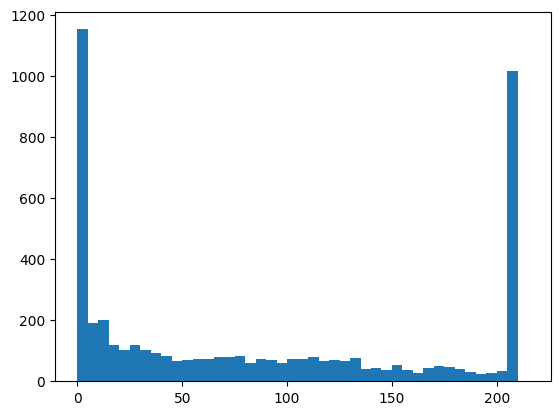

In [29]:
plt.hist(df3['LATEST_ORDER_DATE'], bins=range(0, 220, 5))
plt.show()

In [30]:
# 먼저, 총 주문 수가 10회 이하인 사람을 추려낸다.
df3.loc[df3['TOTAL_ORDERS'] <= 10].count()

TOTAL_ORDERS             2715
REVENUE                  2715
LATEST_ORDER_DATE        2715
CATEGORY_LATEST_ORDER    2715
dtype: int64

In [31]:
df3.loc[df3['TOTAL_ORDERS'] <= 10]['REVENUE'].mean()

538.0836206261511

In [32]:
df3_order_more_10 = df3.loc[df3['TOTAL_ORDERS'] > 10]
df3_order_more_10.head()

,TOTAL_ORDERS,REVENUE,LATEST_ORDER_DATE,CATEGORY_LATEST_ORDER
0,124,11986.54,1,0_to_30
1,82,11025.96,1,0_to_30
2,43,7259.69,1,0_to_30
3,44,6992.27,1,0_to_30
4,55,6263.44,1,0_to_30


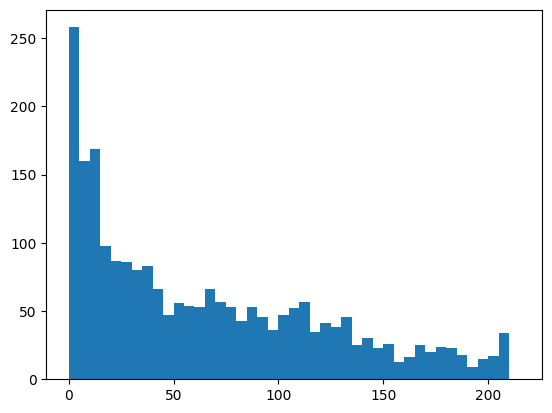

In [33]:
plt.hist(df3_order_more_10['LATEST_ORDER_DATE'], bins=range(0, 220, 5))
plt.show()

In [34]:
print(df3.loc[df3['CATEGORY_LATEST_ORDER'] == '0_to_30']['CATEGORY_LATEST_ORDER'].count())
print(df3.loc[df3['CATEGORY_LATEST_ORDER'] == '31_to_50']['CATEGORY_LATEST_ORDER'].count())
print(df3.loc[df3['CATEGORY_LATEST_ORDER'] == '51_to_100']['CATEGORY_LATEST_ORDER'].count())
print(df3.loc[df3['CATEGORY_LATEST_ORDER'] == '100_to_max']['CATEGORY_LATEST_ORDER'].count())
print('-----------------------------')
print(df3_order_more_10.loc[df3_order_more_10['CATEGORY_LATEST_ORDER'] == '0_to_30']['CATEGORY_LATEST_ORDER'].count())
print(df3_order_more_10.loc[df3_order_more_10['CATEGORY_LATEST_ORDER'] == '31_to_50']['CATEGORY_LATEST_ORDER'].count())
print(df3_order_more_10.loc[df3_order_more_10['CATEGORY_LATEST_ORDER'] == '51_to_100']['CATEGORY_LATEST_ORDER'].count())
print(df3_order_more_10.loc[df3_order_more_10['CATEGORY_LATEST_ORDER'] == '100_to_max']['CATEGORY_LATEST_ORDER'].count())

1885
344
721
2050
-----------------------------
858
276
517
634


주문 수가 10회 이하인 사람들 중 대부분은 신규 유입 또는 장기 미사용 고객인 것을 볼 수 있다.  
다시 분산분석, 사후분석 진행

In [35]:
pg.welch_anova(dv='TOTAL_ORDERS', between='CATEGORY_LATEST_ORDER', data=df3_order_more_10)

,Source,ddof1,ddof2,F,p-unc,np2
0,CATEGORY_LATEST_ORDER,3,955.808488,14.343587,3.798107e-09,0.014898


In [36]:
scikit_posthocs.posthoc_scheffe(df3_order_more_10, val_col='TOTAL_ORDERS', group_col='CATEGORY_LATEST_ORDER')

,0_to_30,31_to_50,51_to_100,100_to_max
0_to_30,1.000000e+00,0.930862,0.373785,3.877329e-07
31_to_50,9.308615e-01,1.000000,0.921046,6.203126e-03
51_to_100,3.737848e-01,0.921046,1.000000,9.005155e-03
100_to_max,3.877329e-07,0.006203,0.009005,1.000000e+00


In [37]:
pg.welch_anova(dv='REVENUE', between='CATEGORY_LATEST_ORDER', data=df3_order_more_10)

,Source,ddof1,ddof2,F,p-unc,np2
0,CATEGORY_LATEST_ORDER,3,941.542335,0.306896,0.820424,0.000459


In [38]:
scikit_posthocs.posthoc_scheffe(df3_order_more_10, val_col='REVENUE', group_col='CATEGORY_LATEST_ORDER')

,0_to_30,31_to_50,51_to_100,100_to_max
0_to_30,1.000000,0.995921,0.947396,0.972793
31_to_50,0.995921,1.000000,0.997243,0.951359
51_to_100,0.947396,0.997243,1.000000,0.805919
100_to_max,0.972793,0.951359,0.805919,1.000000


In [39]:
print(df3_order_more_10.loc[df3_order_more_10['CATEGORY_LATEST_ORDER'] == '0_to_30', 'TOTAL_ORDERS'].mean())
print(df3_order_more_10.loc[df3_order_more_10['CATEGORY_LATEST_ORDER'] == '31_to_50', 'TOTAL_ORDERS'].mean())
print(df3_order_more_10.loc[df3_order_more_10['CATEGORY_LATEST_ORDER'] == '51_to_100', 'TOTAL_ORDERS'].mean())
print(df3_order_more_10.loc[df3_order_more_10['CATEGORY_LATEST_ORDER'] == '100_to_max', 'TOTAL_ORDERS'].mean())
print('--------------------------------------------------------')
print(df3_order_more_10.loc[df3_order_more_10['CATEGORY_LATEST_ORDER'] == '0_to_30', 'REVENUE'].mean())
print(df3_order_more_10.loc[df3_order_more_10['CATEGORY_LATEST_ORDER'] == '31_to_50', 'REVENUE'].mean())
print(df3_order_more_10.loc[df3_order_more_10['CATEGORY_LATEST_ORDER'] == '51_to_100', 'REVENUE'].mean())
print(df3_order_more_10.loc[df3_order_more_10['CATEGORY_LATEST_ORDER'] == '100_to_max', 'REVENUE'].mean())

24.726107226107224
24.184782608695652
23.572533849129595
21.20504731861199
--------------------------------------------------------
3034.1287762237766
3071.9951449275363
3107.7430367504835
2979.2837066246057


주문 수 10회 이상인 고객들로만 분석을 시행한 결과, 분산분석에서는 그룹 간 주문 수의 차이가 유의하다고는 나오지만 사후분석 결과 30일 이내 주문한 고객 그룹과 100일 이상 미주문 고객들 그룹을 제외하고는 그룹 간 유의한 차이가 없다고 결론을 내릴 수 있다.  
또한, 주문 수가 아닌 매출을 종속변수로 설정 시 확실하게 그룹 간 유의한 차이가 없음을 볼 수 있다.  
각 그룹의 평균 주문 수와 매출을 봐도 그룹간 주문 수, 주문액 평균의 유의한 차이가 있다고 볼 수는 없다.  

### 결론 : 최근 주문일과 주문 수, 구매액과는 유의한 차이가 없다.  
따라서, 최근 주문일로는 활성화 고객과 비활성화 고객을 구분하는 용도 정도로 쓸 수 있을 것이다.

## 요일별 분석  
가장 활발한 목요일, 그리고 유의미하게 활봘한 (목, 금, 일) 그룹에 대해서 각각 분석을 진행한다.

In [40]:
data[['TOTAL_ORDERS', 'REVENUE']].describe()

,TOTAL_ORDERS,REVENUE
count,5000.00000,5000.000000
mean,12.87040,1681.523840
std,12.67988,1998.618678
min,1.00000,38.500000
25%,3.00000,315.097500
50%,8.00000,966.725000
75%,20.00000,2493.072500
max,156.00000,34847.400000


상위 그룹을 주문 수 총 주문 수 또는 구매액이 상위 10%에 드는 고객들로 설정한다.

In [41]:
data[['TOTAL_ORDERS', 'REVENUE']].quantile(q=0.9)

TOTAL_ORDERS      28.000
REVENUE         3899.444
Name: 0.9, dtype: float64

In [42]:
df_vip = data.loc[(data['TOTAL_ORDERS'] >= 28) | (data['REVENUE'] >= 3899)]
df_not_vip = data.loc[(data['TOTAL_ORDERS'] < 28) & (data['REVENUE'] < 3899)]
df_vip.describe()

,index,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
count,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,...,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000
mean,2185.233422,3043.531830,33.415119,4929.109324,173.075239,108.481127,3.251751,1290.851459,58.327586,44.207268,...,1267.908395,1328.757387,2.766578,9.558355,11.513263,9.576923,386.671724,1424.186963,1701.227706,1417.022931
std,889.113763,1846.878847,15.468902,2854.899842,123.204859,64.129341,1.289394,707.056004,51.855762,34.705435,...,1069.441247,943.278513,3.868852,7.265953,7.065090,6.817098,646.043133,1471.010010,1282.707357,1253.869429
min,0.000000,2333.000000,5.000000,532.690000,11.220000,0.000000,0.000000,90.000000,1.000000,1.640000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1503.250000,2521.250000,25.000000,3443.555000,96.687500,66.892500,2.400000,679.750000,14.000000,18.805000,...,658.435000,728.070000,0.000000,5.000000,7.000000,5.000000,0.000000,655.717500,891.600000,614.317500
50%,2118.500000,2709.500000,31.000000,4319.395000,135.840000,99.815000,3.290000,1267.000000,41.500000,36.065000,...,1025.330000,1162.425000,1.000000,8.000000,10.000000,8.000000,178.475000,1130.590000,1443.460000,1118.730000
75%,2901.750000,3045.500000,39.000000,5451.762500,210.430000,137.567500,4.177500,1737.000000,96.000000,56.910000,...,1569.485000,1681.377500,4.000000,13.000000,15.000000,13.000000,497.775000,1829.742500,2190.522500,1813.895000
max,3984.000000,39212.000000,156.000000,34847.400000,1294.000000,529.590000,13.610000,2822.000000,205.000000,233.330000,...,12946.220000,8274.970000,34.000000,61.000000,58.000000,64.000000,7700.240000,23832.770000,17749.010000,12995.020000


In [43]:
df_vip_weekday_order = df_vip.iloc[:, 11:18].sum()
df_vip_weekday_revenue = df_vip.iloc[:, 18:25].sum()

df_not_vip_weekday_order = df_not_vip.iloc[:, 11:18].sum()
df_not_vip_weekday_revenue = df_not_vip.iloc[:, 18:25].sum()

In [44]:
df_vip_weekday_order.index

Index(['MONDAY_ORDERS', 'TUESDAY_ORDERS', 'WEDNESDAY_ORDERS',
       'THURSDAY_ORDERS', 'FRIDAY_ORDERS', 'SATURDAY_ORDERS', 'SUNDAY_ORDERS'],
      dtype='object')

In [45]:
df_vip.shape

(754, 41)

In [46]:
df_not_vip.shape

(4246, 41)

In [47]:
print(df_vip_weekday_order)
print('------------------')
print(df_vip_weekday_revenue)

MONDAY_ORDERS       3241
TUESDAY_ORDERS      3660
WEDNESDAY_ORDERS    3710
THURSDAY_ORDERS     3755
FRIDAY_ORDERS       3911
SATURDAY_ORDERS     3424
SUNDAY_ORDERS       3494
dtype: int64
------------------
MONDAY_REVENUE       484940.72
TUESDAY_REVENUE      556564.27
WEDNESDAY_REVENUE    554865.99
THURSDAY_REVENUE     540417.31
FRIDAY_REVENUE       551950.22
SATURDAY_REVENUE     497897.93
SUNDAY_REVENUE       529911.99
dtype: float64


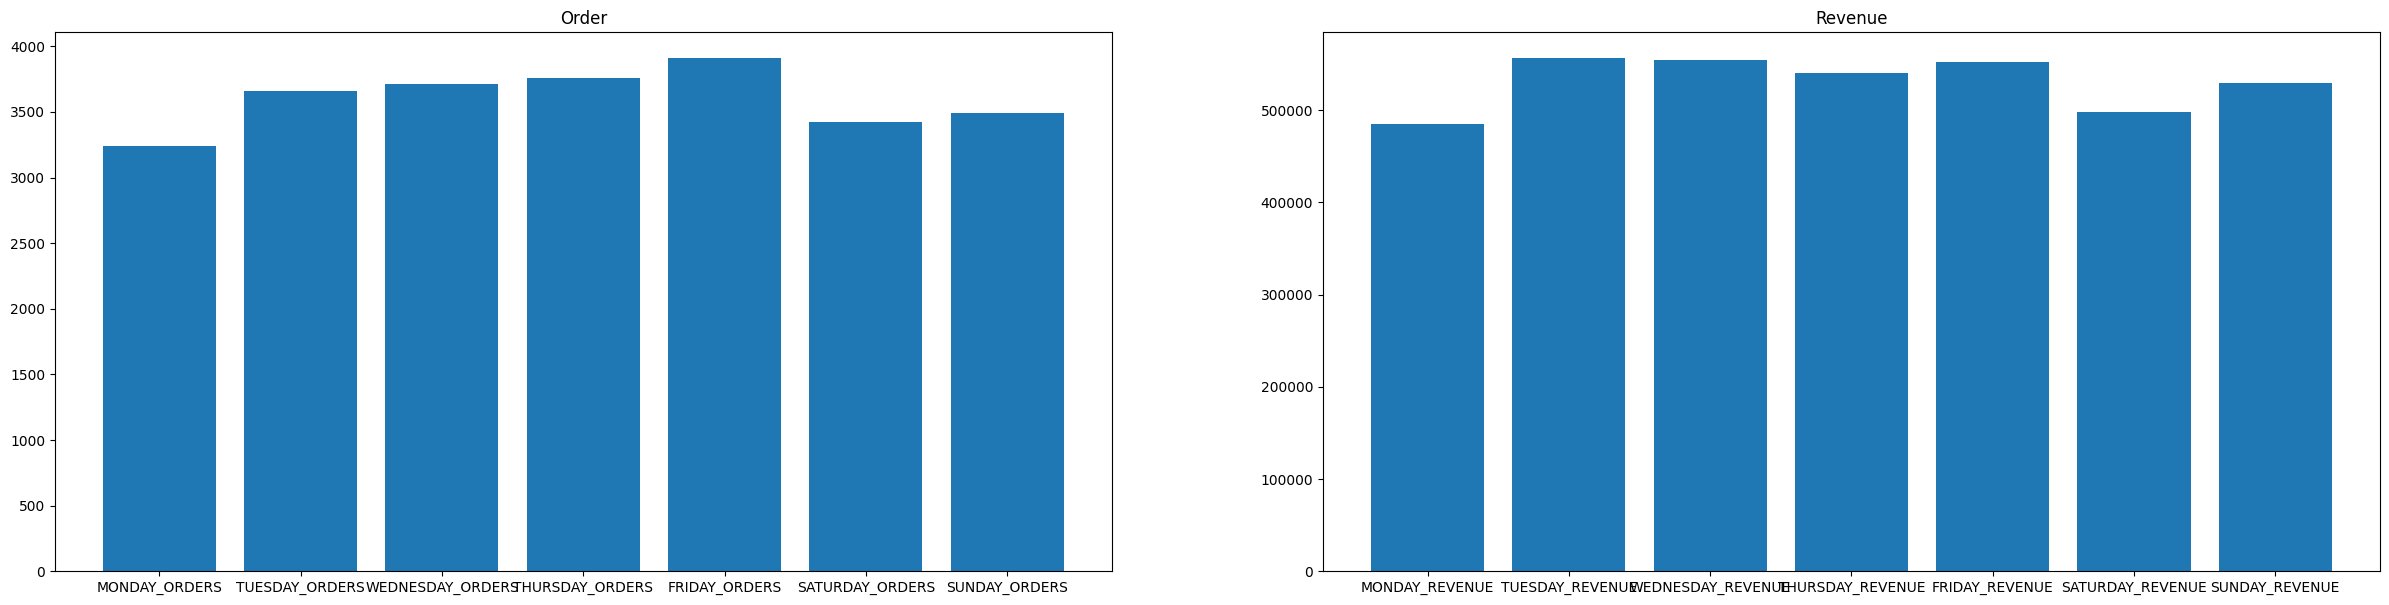

In [48]:
f, axes = plt.subplots(1, 2)
f.set_size_inches(30, 7)

axes[0].bar(df_vip_weekday_order.index, df_vip_weekday_order)
axes[0].set_title('Order')

axes[1].bar(df_vip_weekday_revenue.index, df_vip_weekday_revenue)
axes[1].set_title('Revenue')
plt.show()

In [49]:
print(df_not_vip_weekday_order)
print('------------------')
print(df_not_vip_weekday_revenue)

MONDAY_ORDERS       4904
TUESDAY_ORDERS      5112
WEDNESDAY_ORDERS    5280
THURSDAY_ORDERS     6915
FRIDAY_ORDERS       5820
SATURDAY_ORDERS     4993
SUNDAY_ORDERS       6133
dtype: int64
------------------
MONDAY_REVENUE       591100.96
TUESDAY_REVENUE      610987.88
WEDNESDAY_REVENUE    623580.48
THURSDAY_REVENUE     789331.67
FRIDAY_REVENUE       700952.55
SATURDAY_REVENUE     600312.57
SUNDAY_REVENUE       774804.66
dtype: float64


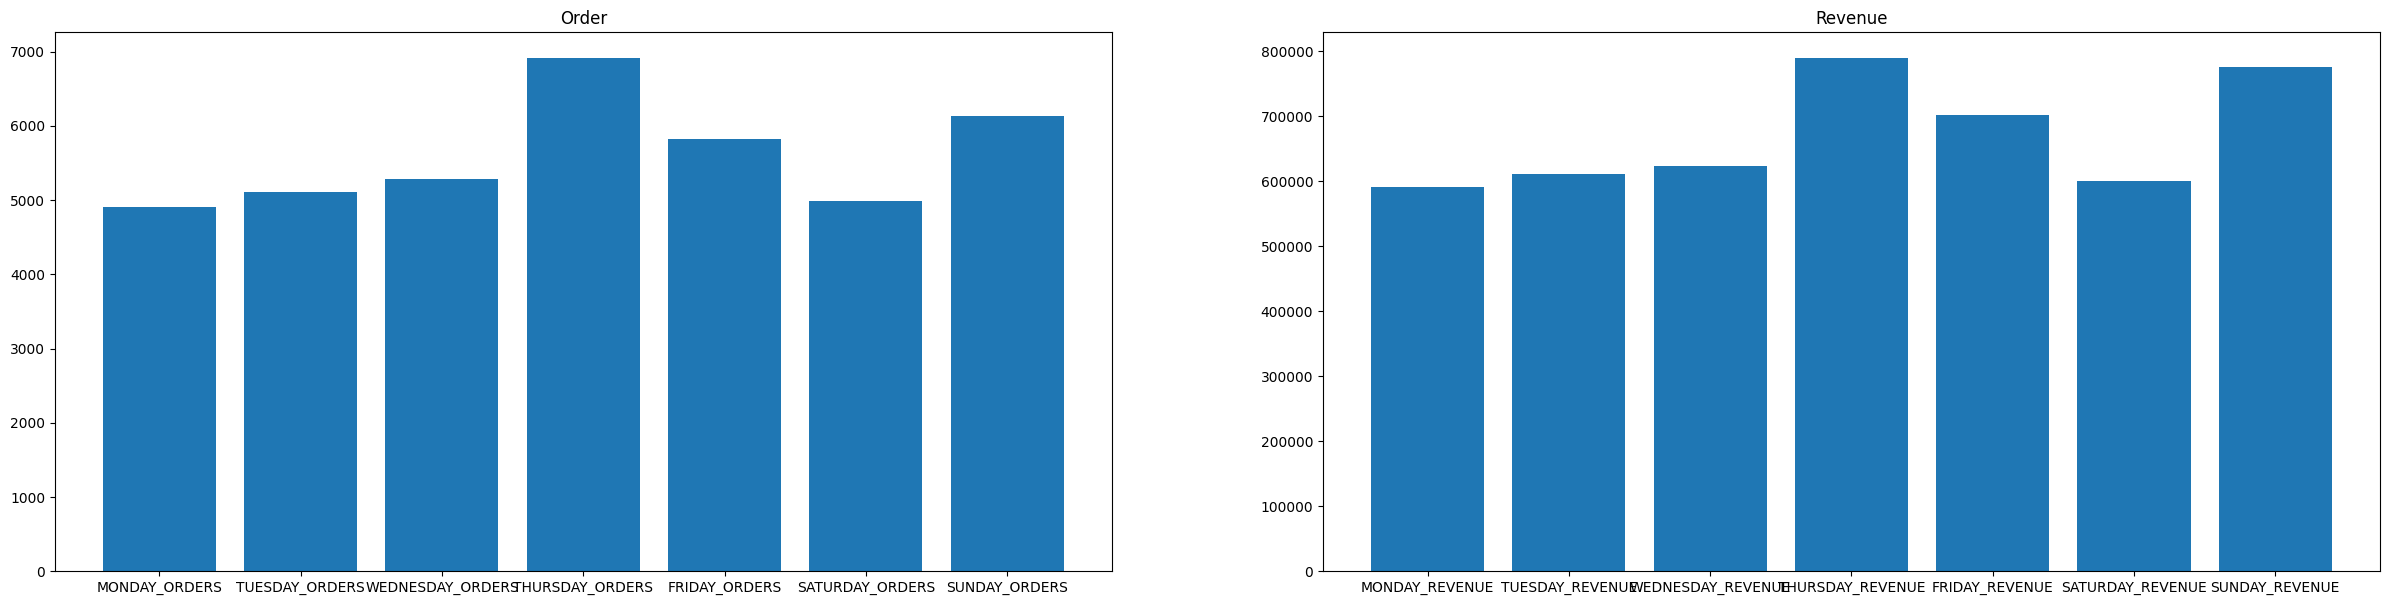

In [50]:
f, axes = plt.subplots(1, 2)
f.set_size_inches(30, 7)

axes[0].bar(df_not_vip_weekday_order.index, df_not_vip_weekday_order)
axes[0].set_title('Order')

axes[1].bar(df_not_vip_weekday_revenue.index, df_not_vip_weekday_revenue)
axes[1].set_title('Revenue')
plt.show()

시각화 자료를 보면, 상위 그룹의 경우 (금, 토, 일)주말보다는 평일에 더욱 활발한 경향이 있지만 뚜렷한 차이는 보이지 않는다.  
반면 비 상위 그룹의 경우 (목, 금, 일)요일에 뚜렷하게 활발한 차이를 보인다.  
  
  상위 그룹과 비 상위 그룹에서, (목, 금, 일)요일의 평균 주문수와 구매액, 이외 요일의 평균 주문수와 구매액이 총 주문 수와 구매액에 영향을 미치는지 다중회귀분석을 진행한다.

In [51]:
import numpy as np
import statsmodels.formula.api as smf
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF 값이 모두 2.02로 다중공선성 문제 X

In [54]:
# 요거 원본 데이터서 'mean_TFS'와 'mean_MTWS' order와 revenue로 추가한 후 vip와 not_vip 나누기

df_vip.loc[:, 'mean_order_TFS'] = (df_vip['THURSDAY_ORDERS'] + df_vip['FRIDAY_ORDERS'] + df_vip['SATURDAY_ORDERS']) / 3
df_vip.loc[:, 'mean_order_MTWS'] = (df_vip['MONDAY_ORDERS'] + df_vip['TUESDAY_ORDERS'] + df_vip['WEDNESDAY_ORDERS'] + df_vip['SATURDAY_ORDERS']) / 4

df_not_vip.loc[:, 'mean_order_TFS'] = (df_not_vip['THURSDAY_ORDERS'] + df_not_vip['FRIDAY_ORDERS'] + df_not_vip['SATURDAY_ORDERS']) / 3
df_not_vip.loc[:, 'mean_order_MTWS'] = (df_not_vip['MONDAY_ORDERS'] + df_not_vip['TUESDAY_ORDERS'] + df_not_vip['WEDNESDAY_ORDERS'] + df_not_vip['SATURDAY_ORDERS']) / 4

In [53]:
# 요일, 주차, 시간 모두 p-value를 따지는 통계적 회귀분석 보다는, 머신러닝의 회귀분석을 이용해 회귀선을 만들고 식을 통해 결론 도출하기

상위 10% 고객을 제외한 데이터에서 주차별, 시간대별 추이 확인

In [56]:
df_not_vip_week = df_not_vip[['CustomerID', 'WEEK1_DAY01_DAY07_ORDERS', 'WEEK2_DAY08_DAY15_ORDERS', 'WEEK3_DAY16_DAY23_ORDERS', 'WEEK4_DAY24_DAY31_ORDERS',
                'WEEK1_DAY01_DAY07_REVENUE', 'WEEK2_DAY08_DAY15_REVENUE', 'WEEK3_DAY16_DAY23_REVENUE', 'WEEK4_DAY24_DAY31_REVENUE']]

df_not_vip_time = df_not_vip[['CustomerID', 'TIME_0000_0600_ORDERS', 'TIME_0601_1200_ORDERS', 'TIME_1200_1800_ORDERS', 'TIME_1801_2359_ORDERS',
                'TIME_0000_0600_REVENUE', 'TIME_0601_1200_REVENUE', 'TIME_1200_1800_REVENUE', 'TIME_1801_2359_REVENUE']]

In [58]:
df_not_vip_week_order = df_not_vip_week.iloc[:, 1:5]
df_not_vip_week_revenue = df_not_vip_week.iloc[:, 5:]

sum_order_not_vip_week = []
sum_revenue_not_vip_week = []

for i in range(4):
    sum_order_not_vip_week.append(df_not_vip_week_order.iloc[:, i].sum())
    sum_revenue_not_vip_week.append(int(df_not_vip_week_revenue.iloc[:, i].sum()))
print(sum_order_not_vip_week)
print(sum_revenue_not_vip_week)

[9449, 8975, 9614, 11119]
[1085169, 1082338, 1153131, 1370431]


In [59]:
df_not_vip_time_order = df_not_vip_time.iloc[:, 1:5]
df_not_vip_time_revenue = df_not_vip_time.iloc[:, 5:]

sum_not_vip_order_time = []
sum_not_vip_revenue_time = []

for i in range(4):
    sum_not_vip_order_time.append(df_not_vip_time_order.iloc[:, i].sum())
    sum_not_vip_revenue_time.append(int(df_not_vip_time_revenue.iloc[:, i].sum()))
print(sum_not_vip_order_time)
print(sum_not_vip_revenue_time)

[3058, 11524, 13489, 11086]
[363762, 1360482, 1640932, 1325893]


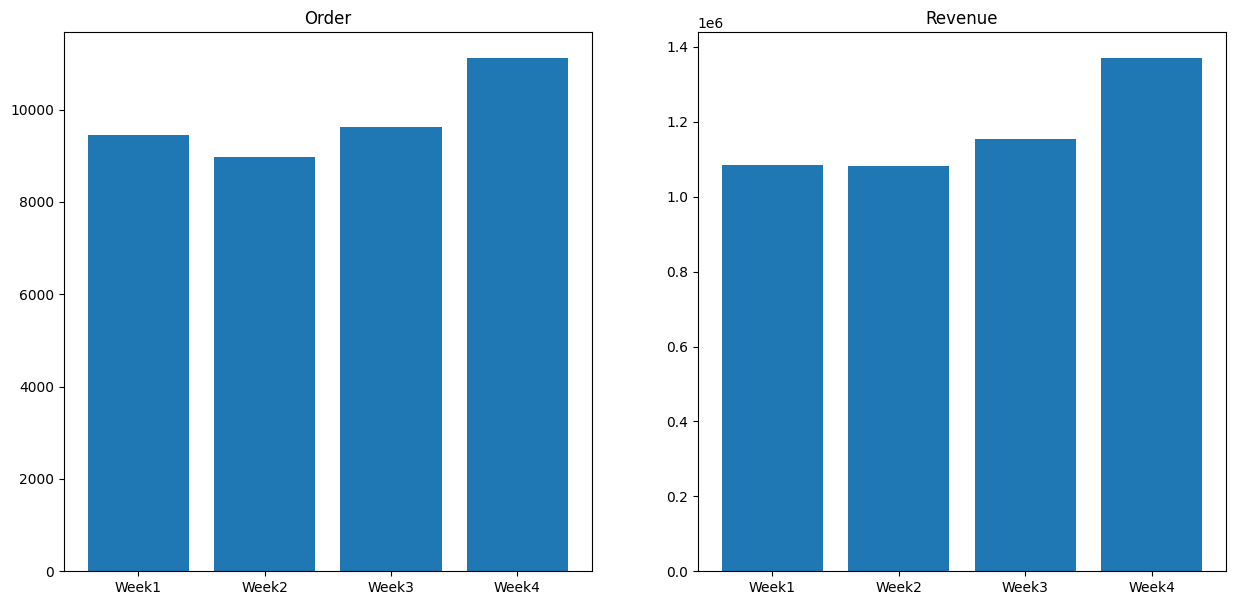

In [60]:
# 상위 10% 제외한 고객들의 주차별 주문량, 구매액
week = ['Week1', 'Week2', 'Week3', 'Week4']

f, axes = plt.subplots(1, 2)
f.set_size_inches(15, 7)

axes[0].bar(week, sum_order_not_vip_week)
axes[0].set_title('Order')

axes[1].bar(week, sum_revenue_not_vip_week)
axes[1].set_title('Revenue')
plt.show()

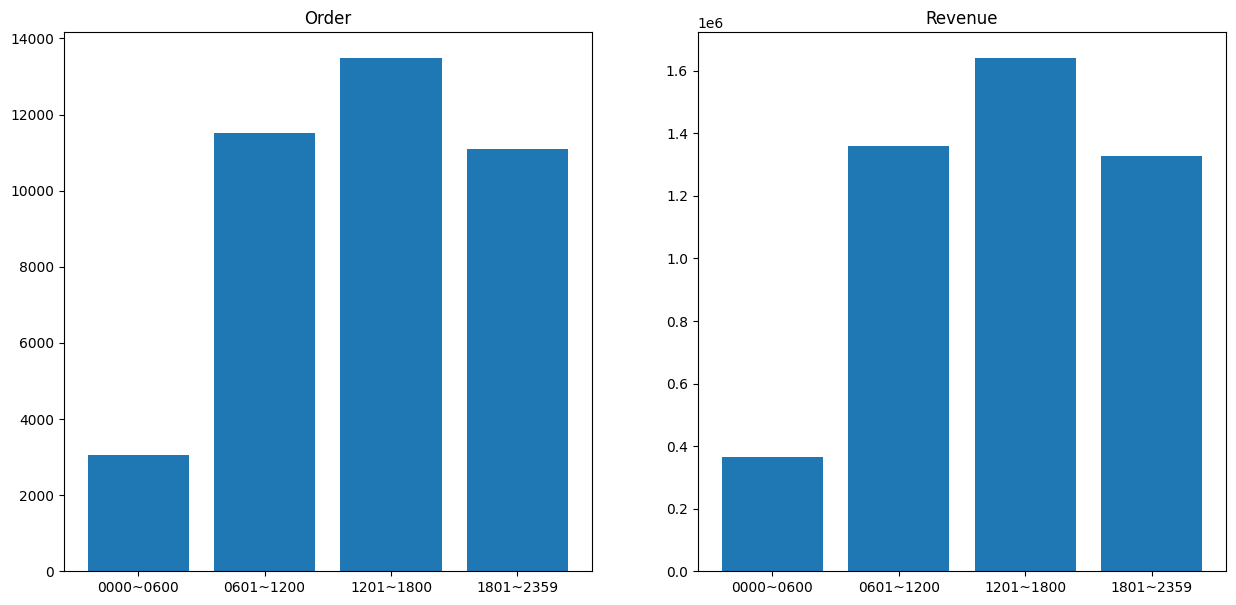

In [61]:
# 상위 10% 고객들을 제외한 시간대별 고객의 주문량, 구매액
time = ['0000~0600', '0601~1200', '1201~1800', '1801~2359']

f, axes = plt.subplots(1, 2)
f.set_size_inches(15, 7)

axes[0].bar(time, sum_not_vip_order_time)
axes[0].set_title('Order')

axes[1].bar(time, sum_not_vip_revenue_time)
axes[1].set_title('Revenue')
plt.show()